In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas_datareader import wb
import pandas_datareader as pdr
from datetime import datetime

In [3]:
import statwrap
%use_sheets

# Nutritional Info

In [4]:
df = pd.read_csv("../Data/Nutrition/nutritional_info.csv")

# drop almonds
#df = df.query("Food Item != 'Almonds'")
df = df[df['Food Item'] != 'Almonds']

# predict cal from protein 
line, summary = linest(df['Calories (per 100g)'], df['Protein (g per 100g)'], verbose = True)
#line, summary = linest(df['Protein (g per 100g)'], df['Calories (per 100g)'], verbose = True)

line

/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


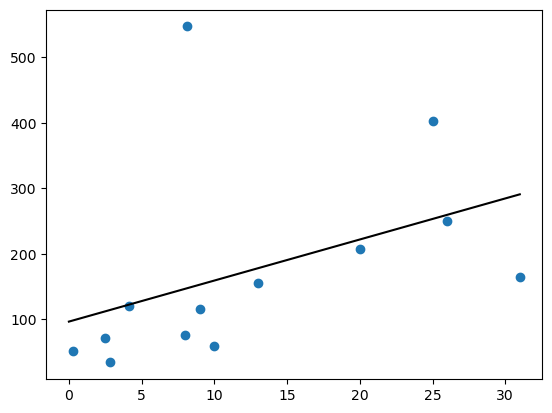

In [5]:
plt.scatter(df['Protein (g per 100g)'], df['Calories (per 100g)'])
plt.plot([0, 31], [line(0), line(31)], color = 'black')# [2, line(31)])

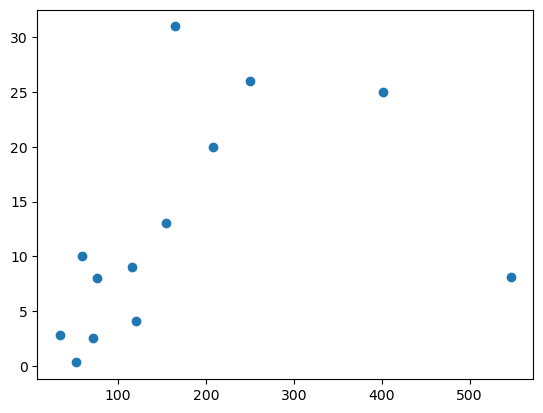

In [6]:
plt.scatter(df['Calories (per 100g)'], df['Protein (g per 100g)'] )

# GDP and Lights

In [7]:
# Lights data

dfl = pd.read_csv("../Data/GdpAndLights/Harmo_zonalstat_1992_2018.csv")

In [8]:
dfl['diff'] = dfl['Y2018_mean'] - dfl['Y1993_mean']
dfl['growth'] = dfl['diff']/dfl['Y1993_mean']

#dfl['growth'] = ((dfl['Y2014_mean']/dfl['Y2003_mean']) ** (1/(2014-2003))) - 1

dfl.head()

,OBJECTID,CNTRY_NAME,_mean,Y1993_mean,Y1994_mean,Y1995_mean,Y1996_mean,Y1997_mean,Y1998_mean,Y1999_mean,...,Y2011_mean,Y2012_mean,Y2013_mean,Y2014_mean,Y2015_mean,Y2016_mean,Y2017_mean,Y2018_mean,diff,growth
0,1,Aruba,30.646091,30.679012,30.061728,33.962963,32.477366,35.995885,39.753086,38.407407,...,35.705882,37.283951,36.732510,29.790123,30.226337,31.835391,36.699588,37.074074,6.395062,0.208451
1,2,Antigua and Barbuda,6.403077,8.044615,8.038462,9.280000,9.515385,10.443077,10.350769,10.987692,...,17.364048,15.769231,15.553846,16.666154,17.067692,15.700000,17.266154,17.441538,9.396923,1.168101
2,3,Afghanistan,0.027412,0.019952,0.017496,0.029280,0.029321,0.027617,0.033065,0.028123,...,0.173971,0.209232,0.190876,0.566413,0.483433,0.443360,7.020102,2.041443,2.021491,101.316422
3,4,Algeria,0.503553,0.474245,0.472789,0.544730,0.534737,0.506146,0.532425,0.531688,...,0.831458,0.915456,0.920914,1.735160,1.800834,1.787529,3.569371,2.799999,2.325754,4.904125
4,5,Azerbaijan,1.916989,2.447440,1.960497,2.332517,2.124703,1.814333,2.062260,2.297675,...,2.738552,3.558808,3.424774,6.942340,6.579300,6.324827,9.152183,7.989640,5.542200,2.264488


In [9]:
dfl[dfl.CNTRY_NAME.str.contains("States")]

,OBJECTID,CNTRY_NAME,_mean,Y1993_mean,Y1994_mean,Y1995_mean,Y1996_mean,Y1997_mean,Y1998_mean,Y1999_mean,...,Y2011_mean,Y2012_mean,Y2013_mean,Y2014_mean,Y2015_mean,Y2016_mean,Y2017_mean,Y2018_mean,diff,growth
73,74,Federated States of Micronesia,1.014901,1.925497,2.155629,3.367550,2.943709,2.642384,2.923841,2.690397,...,2.241776,2.004967,1.683775,3.233444,3.602649,3.314570,6.291391,6.448675,4.523179,2.349097
232,233,United States,3.594928,3.799162,3.773146,4.108279,4.132442,4.031217,4.184936,4.392588,...,4.413708,4.316884,4.460633,6.656070,7.927668,6.934491,7.853123,7.128842,3.329680,0.876425


In [10]:
# Indicator for GDP in current US dollars
indicator_gdp = 'NY.GDP.MKTP.CD'

# Fetch GDP data for the start and end years
start_year = 1993
end_year = 2018

# Using pandas_datareader to fetch GDP for the specified years
gdp_start = pdr.wb.download(indicator=indicator_gdp, country='all', start=datetime(start_year, 1, 1), end=datetime(start_year, 1, 1))
gdp_end = pdr.wb.download(indicator=indicator_gdp, country='all', start=datetime(end_year, 1, 1), end=datetime(end_year, 1, 1))

# Reset index to turn multiindex DataFrame into a simple DataFrame
gdp_start.reset_index(inplace=True)
gdp_end.reset_index(inplace=True)

# Rename the GDP column for clarity
gdp_start.rename(columns={indicator_gdp: 'GDP_Start'}, inplace=True)
gdp_end.rename(columns={indicator_gdp: 'GDP_End'}, inplace=True)

# Dropping unnecessary columns
gdp_start.drop(columns=['year'], inplace=True)
gdp_end.drop(columns=['year'], inplace=True)

# Merging the start and end GDP dataframes on country
gdp_merged = pd.merge(gdp_start, gdp_end, on='country')

# Calculate the CAGR
#gdp_merged['CAGR'] = ((gdp_merged['GDP_End'] / gdp_merged['GDP_Start']) ** (1 / (end_year - start_year))) - 1

gdp_merged['GDP_growth'] = (gdp_merged['GDP_End'] - gdp_merged['GDP_Start']) / gdp_merged['GDP_Start']

# Display the CAGR for each country
#print(gdp_merged[['country', 'growth']])
gdp_merged.replace("Russian Federation",'Russia', inplace = True)
gdp_merged.replace("Turkiye",'Turkey', inplace = True)

In [11]:
import pandas_datareader as pdr
from datetime import datetime

# Define the start and end years for the data
start = datetime(2003, 1, 1)
end = datetime(2014, 12, 31)

# Define the indicator for GDP growth (annual %)
indicator = 'NY.GDP.MKTP.KD.ZG'

# Use the World Bank's API to download the data for Russia ('RUS')
gdp_growth_russia = pdr.wb.download(indicator=indicator, country=['TUR'], start=start.year, end=end.year)

# Reset the index to make the data easier to work with
gdp_growth_russia.reset_index(inplace=True)

# Display the data
print(gdp_growth_russia)


    country  year  NY.GDP.MKTP.KD.ZG
0   Turkiye  2014           4.939715
1   Turkiye  2013           8.485817
2   Turkiye  2012           4.788493
3   Turkiye  2011          11.200111
4   Turkiye  2010           8.427104
5   Turkiye  2009          -4.823154
6   Turkiye  2008           0.815025
7   Turkiye  2007           5.043508
8   Turkiye  2006           6.947988
9   Turkiye  2005           8.992305
10  Turkiye  2004           9.795936
11  Turkiye  2003           5.763206


In [12]:
xx = gdp_merged.merge(dfl, right_on = 'CNTRY_NAME', left_on = 'country')

In [13]:
list(xx.country)

dem = [
    #'Andorra',
    'Australia',
    #'Austria',
    #'Bahamas, The',
    #'Barbados',
    'Belgium',
    #'Belize',
    #'Botswana',
    'Canada',
    #'Chile',
    #'Costa Rica',
    #'Croatia',
    #'Cyprus',
    #'Czech Republic', # Adjusted from the list as Czechia
    'Denmark',
    #'Dominica',
    #'Estonia',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    #'Jamaica',
    'Japan',
    #'Latvia',
    #'Liechtenstein',
    #'Lithuania',
    'Luxembourg',
    #'Malta',
    #'Mauritius',
    #'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    #'Panama',
    #'Poland',
    'Portugal',
    #'Romania',
    #'Sao Tome and Principe',
    #'Seychelles',
    #'Slovakia', # Adjusted from the list as it's commonly referred to
    #'Slovenia',
    'South Africa',
    'Spain',
    #'St. Kitts and Nevis',
    #'St. Lucia',
    #'St. Vincent and the Grenadines',
    'Sweden',
    'Switzerland',
    #'Taiwan', # Not listed but recognized as a liberal democracy
    #'Trinidad and Tobago',
    'United Kingdom',
    'United States',
    #'Uruguay'
]


extra = ['China', 'Russia', 'Ethiopia', 'Zimbabwe', 'Turkey']
extra = ['China']

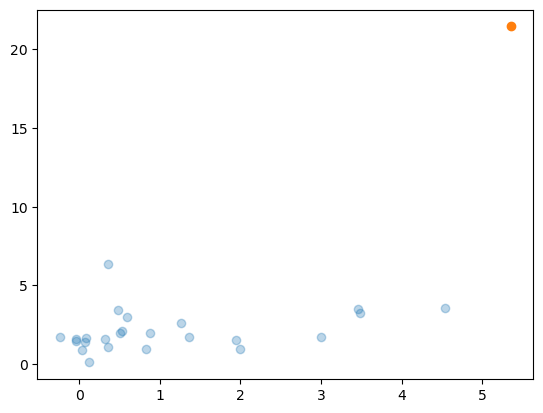

In [14]:
zz = xx[xx.country.isin(dem)]
aa = xx[xx.country.isin(extra)]

plt.scatter(zz.growth, zz.GDP_growth, alpha = .3)
plt.scatter(aa.growth, aa.GDP_growth, alpha = 1)


In [15]:
zz

,country,GDP_Start,GDP_End,GDP_growth,OBJECTID,CNTRY_NAME,_mean,Y1993_mean,Y1994_mean,Y1995_mean,...,Y2011_mean,Y2012_mean,Y2013_mean,Y2014_mean,Y2015_mean,Y2016_mean,Y2017_mean,Y2018_mean,diff,growth
10,Australia,3.121283e+11,1.429734e+12,3.580596,12,Australia,0.147770,0.163989,0.162287,0.193805,...,0.229140,0.257538,0.247082,0.942274,0.861901,0.677030,1.089851,0.908175,0.744186,4.538029
17,Belgium,2.247218e+11,5.432991e+11,1.417652,20,Belgium,26.149732,25.842726,26.548844,29.612584,...,29.002389,32.336709,30.684936,26.370817,26.369355,26.264304,26.707651,27.588176,1.745449,0.067541
32,Canada,5.790536e+11,1.725329e+12,1.979568,36,Canada,0.631143,0.643812,0.568796,0.758320,...,0.666787,0.621440,0.708127,0.758224,3.101584,1.827256,2.717665,0.971880,0.328068,0.509571
44,Denmark,1.431956e+11,3.568412e+11,1.491984,56,Denmark,8.270944,7.424394,7.856226,12.342899,...,9.400206,11.806764,10.146329,6.051779,6.064766,6.370230,6.137433,7.095691,-0.328703,-0.044273
56,Finland,8.921411e+10,2.757080e+11,2.090408,71,Finland,2.632660,3.441624,3.840725,4.628784,...,4.082690,5.357023,5.208075,3.498444,4.490347,4.520008,4.573485,5.275856,1.834232,0.532955
57,France,1.322816e+12,2.790957e+12,1.109861,78,France,6.932591,6.939767,6.693572,8.820150,...,10.641444,11.676700,11.334406,9.671473,9.405305,9.199784,9.623278,9.407317,2.467549,0.355567
62,Germany,2.071324e+12,3.974443e+12,0.918794,88,Germany,10.255712,9.109177,9.073796,12.459527,...,13.456891,15.226946,13.559539,8.248729,8.433948,8.143830,9.125137,9.431546,0.322368,0.035389
65,Greece,1.088091e+11,2.120494e+11,0.948822,92,Greece,3.196137,3.710986,3.666056,4.628585,...,6.707035,7.216591,7.170548,9.955121,9.763206,9.691994,11.696299,11.130353,7.419366,1.999298
75,Hungary,4.012492e+10,1.605656e+11,3.001644,102,Hungary,3.473999,4.179097,3.917800,6.392925,...,6.061946,7.002876,5.774012,6.288085,5.730186,6.033698,6.804123,6.640899,2.461801,0.589075
76,Iceland,6.218582e+09,2.626085e+10,3.222965,103,Iceland,0.347697,0.544285,0.387531,0.471408,...,1.016193,0.864343,0.918575,1.694812,6.093808,1.449871,1.370380,2.442661,1.898376,3.487833


In [16]:
dfl.CNTRY_NAME.to_list()

set(dfl.CNTRY_NAME)-set(gdp_merged.country)

{'Anguilla',
 'Antarctica',
 'Baker Island',
 'Bouvet Island',
 'British Indian Ocean Territory',
 'Brunei',
 'Byelarus',
 'Cape Verde',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo',
 'Cook Islands',
 'Czech Republic',
 'Egypt',
 'Falkland Islands (Islas Malvinas)',
 'Federated States of Micronesia',
 'French Guiana',
 'French Southern & Antarctic Lands',
 'Gaza Strip',
 'Glorioso Islands',
 'Guadeloupe',
 'Guernsey',
 'Heard Island & McDonald Islands',
 'Howland Island',
 'Iran',
 'Ivory Coast',
 'Jan Mayen',
 'Jarvis Island',
 'Jersey',
 'Johnston Atoll',
 'Juan De Nova Island',
 'Kyrgyzstan',
 'Laos',
 'Macau',
 'Macedonia',
 'Man, Isle of',
 'Martinique',
 'Mayotte',
 'Midway Islands',
 'Montserrat',
 'Myanmar (Burma)',
 'Netherlands Antilles',
 'Niue',
 'Norfolk Island',
 'North Korea',
 'Pacific Islands (Palau)',
 'Paracel Islands',
 'Pitcairn Islands',
 'Reunion',
 'Slovakia',
 'South Georgia and the South Sandwich Is',
 'South Korea',
 'Spratly Islands',
 'St. Hele

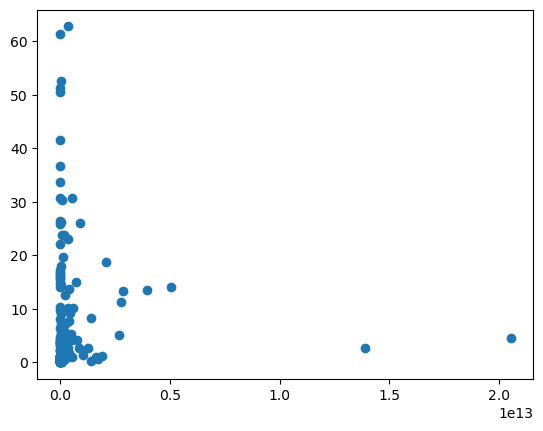

In [17]:
plt.scatter(xx.GDP_End, xx.Y2013_mean)

# Father and Son Heights

In [18]:
df = pd.read_csv("../Data/FatherSonHeights/pearson.tsv", sep = '\t')
df.columns = ["Father's Height (inches)", "Son's Height (inches)"]

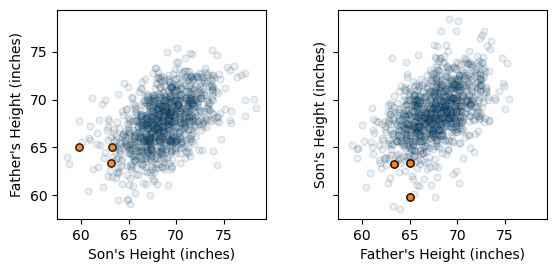

In [19]:
dad = df["Father's Height (inches)"].tail(-3)
son = df["Son's Height (inches)"].tail(-3)

dad1 = df["Father's Height (inches)"].head(3)
son1 = df["Son's Height (inches)"].head(3)


fig, axs = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (6,2.8))

ax = axs[0]
ax.set_aspect(1)
ax.scatter(son, dad, alpha = .1, ec = 'black', s = 23)
ax.scatter(son1, dad1, alpha = .9,ec = 'black', s = 28, fc = 'C1')
ax.set_ylabel("Father's Height (inches)")
ax.set_xlabel("Son's Height (inches)")

ax = axs[1]
ax.set_aspect(1)
ax.scatter(dad, son, alpha = .1, ec = 'black', s = 23)
ax.scatter(dad1, son1, alpha = 1, ec = 'black', s = 28, fc = 'C1')

ax.set_xlabel("Father's Height (inches)")
ax.set_ylabel("Son's Height (inches)")

plt.tight_layout()
#plt.savefig('../book/images/fathersonscatter.svg', transparent = True)

In [20]:
linest(son, dad)

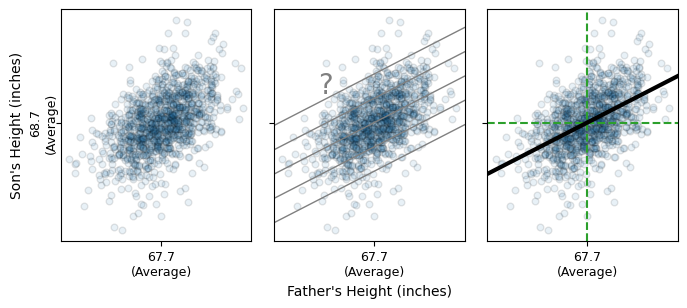

In [21]:
dad = df["Father's Height (inches)"]#.tail(-3)
son = df["Son's Height (inches)"]# .tail(-3)


fig, axs = plt.subplots(1, 3, 
                        figsize = (7,3),
                        sharex = True,
                        sharey = True) #1, 2, sharex = True, sharey = True, figsize = (6,2.8))

for i in range(3):

    ax = axs[i]
    ax.set_aspect(1)
    ax.set_xticks([np.mean(dad)])
    ax.set_yticks([np.mean(son)])
    
    ax.set_xticklabels([f'{np.mean(dad):.1f}\n(Average)'], size = 9)
    ax.set_yticklabels([f'{np.mean(son):.1f}\n(Average)\n'],
                       size = 9,
                       rotation = 90,
                       ha = 'center',
                      va = 'center')

    if i > 1:
        ax.axvline(np.mean(dad), color = 'C2', ls = 'dashed')
        ax.axhline(np.mean(son), color = 'C2', ls = 'dashed')

    ax.scatter(dad, son, alpha = .1, ec = 'black', s = 23)

    if i == 1:
        ax.set_xlabel("Father's Height (inches)")
    if i == 0:
        ax.set_ylabel("Son's Height (inches)")

    if i > 1:
        reg = linest(son,dad)
        x = ax.get_xlim()
        plt.plot(x, reg(x), color = 'black', lw = 3)
        ax.set_xlim(x)
        
    if i == 1:
        
        reg = linest(son,dad)
        x = ax.get_xlim()
        
        s = 2.3
        for k in (-2,-1,0, 1, 2):
            ax.plot(x, reg(x) +s*k, color = 'gray', lw = 1)
            
        x_ = dad.quantile(.05)
        ax.text(x_, reg(x_) + s*k, s = '?', size = 20,
               color = 'gray',
               ha = 'center',
               va = 'bottom')
            
        ax.set_xlim(x)
        
#plt.title("Regression to Mediocrity")
#plt.suptitle("The Regression Line Passes Through the Averages")
#axs[1].text(0.5, 1, s= "The Regression Line Passes Through the Averages",
#            transform = axs[1].transAxes,
#           ha = 'center',
#           va = 'bottom')
plt.tight_layout()
plt.savefig(f'../book/images/FatherSonPanel3.svg', transparent = True)

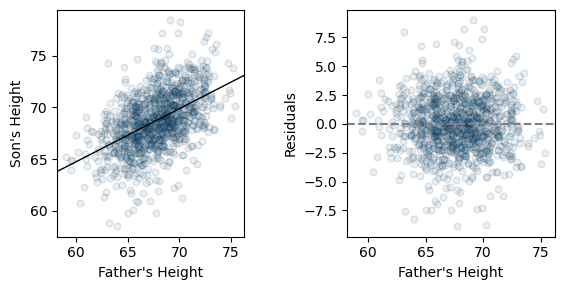

In [22]:
dad = df["Father's Height (inches)"]#.tail(-3)
son = df["Son's Height (inches)"]# .tail(-3)


fig, axs = plt.subplots(1, 2, 
                        figsize = (6,3),
                        sharex = True,
                        sharey = False) #1, 2, sharex = True, sharey = True, figsize = (6,2.8))

x, y = dad, son

for ax in axs:
    ax.set_aspect(1)
    ax.set_xlabel("Father's Height")

ax = axs[0]
ax.scatter(dad, son, alpha = .1, ec = 'black', s = 23)
ax.set_ylabel("Son's Height")

reg = linest(son,dad)
x = ax.get_xlim()
ax.plot(x, reg(x), color = 'black', lw = 1)
ax.set_xlim(x)

ax = axs[1]

ax.axhline(0, color = 'gray', ls = 'dashed')
ax.scatter(dad, reg.residuals, alpha = .1, ec = 'black', s = 23)
ax.set_ylabel('Residuals')
#plt.title("Regression to Mediocrity")
#plt.suptitle("The Regression Line Passes Through the Averages")
#axs[1].text(0.5, 1, s= "The Regression Line Passes Through the Averages",
#            transform = axs[1].transAxes,
#           ha = 'center',
#           va = 'bottom')
plt.tight_layout()
plt.savefig(f'../book/images/FatherSonResidual.svg', transparent = True)

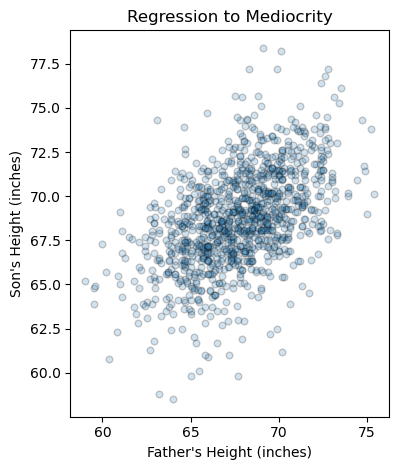

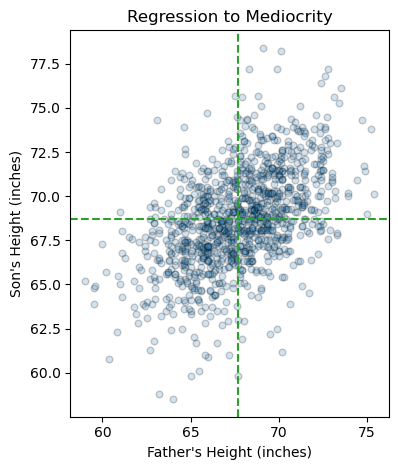

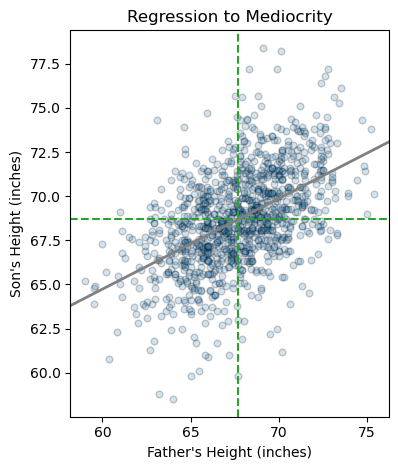

In [23]:
dad = df["Father's Height (inches)"]#.tail(-3)
son = df["Son's Height (inches)"]# .tail(-3)


for i in range(3):

    fig, ax = plt.subplots() #1, 2, sharex = True, sharey = True, figsize = (6,2.8))


    ax.set_aspect(1)
    
    if i > 0:
        ax.axvline(np.mean(dad), color = 'C2', ls = 'dashed')
        ax.axhline(np.mean(son), color = 'C2', ls = 'dashed')

    ax.scatter(dad, son, alpha = .2, ec = 'black', s = 23)

    ax.set_xlabel("Father's Height (inches)")
    ax.set_ylabel("Son's Height (inches)")

    if i > 1:
        reg = linest(son,dad)
        x = ax.get_xlim()
        plt.plot(x, reg(x), color = 'gray', lw = 2)
        ax.set_xlim(x)
        
    plt.title("Regression to Mediocrity")
    plt.tight_layout()
    plt.savefig(f'../book/images/singleFathersonscatter_{i}.svg', transparent = True)

# Bokeh

In [24]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, PointDrawTool

# Display plot within a notebook
output_notebook()

# Sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 5, 8, 2, 7]}
data2 = {'x': [1.5, 2.5, 3.5], 'y': [2.5, 5.5, 7.5]}

# Create ColumnDataSource
source = ColumnDataSource(data)
source2 = ColumnDataSource(data2)

# Create a figure
p = figure(x_range=(0, 6), y_range=(0, 10), tools="")

# Add circle and rectangle glyphs
c1 = p.circle('x', 'y', source=source, size=20)
r1 = p.rect('x', 'y', width=0.1, height=0.1, source=source2)

# Add PointDrawTool to the figure
tool = PointDrawTool(renderers=[c1, r1])
p.add_tools(tool)
p.toolbar.active_tap = tool  # Activate the draw tool

# Show the plot
show(p)


Loading BokehJS ...

In [25]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, PointDrawTool, CustomJS, Div
from bokeh.layouts import column

# Display plot within a notebook
output_notebook()

# Sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 5, 8, 2, 7]}

# Create ColumnDataSource
source = ColumnDataSource(data)

# Create a figure
p = figure(x_range=(0, 6), y_range=(0, 10), tools="")

# Add circle glyph
c1 = p.circle('x', 'y', source=source, size=20, color="navy", alpha=0.5)

# Display for correlation
div = Div(text="Correlation coefficient: ?", width=200, height=30)

# CustomJS for updating the correlation coefficient dynamically
callback = CustomJS(args=dict(source=source, div=div), code="""
    const data = source.data;
    const x = data['x'];
    const y = data['y'];
    const n = x.length;

    let mean_x = 0;
    let mean_y = 0;
    for (let i = 0; i < n; i++) {
        mean_x += x[i];
        mean_y += y[i];
    }
    mean_x /= n;
    mean_y /= n;

    let num = 0;
    let den_x = 0;
    let den_y = 0;
    for (let i = 0; i < n; i++) {
        num += (x[i] - mean_x) * (y[i] - mean_y);
        den_x += (x[i] - mean_x) ** 2;
        den_y += (y[i] - mean_y) ** 2;
    }

    const corr = num / Math.sqrt(den_x * den_y);
    div.text = "Correlation coefficient: " + corr.toFixed(2);
""")

# Add PointDrawTool to the figure
tool = PointDrawTool(renderers=[c1], add=False)
p.add_tools(tool)
p.toolbar.active_tap = tool  # Activate the draw tool

# Attach the callback to the source
source.js_on_change('data', callback)

# Show the plot and the correlation coefficient
show(column(div, p))


Loading BokehJS ...

# ATUS

In [26]:
df = pd.read_csv("../Data/ATUS/ATUS_summary_sample.csv")

for i in df.columns:
    try:
        if df[i].mean() > 100:
            print(i)
    except:
        pass

Unnamed: 0
TUCASEID
TRERNWA
TUFNWGTP
TUYEAR
TU20FWGT
t010101
t050101
t120303


In [27]:
import statwrap
%use_all

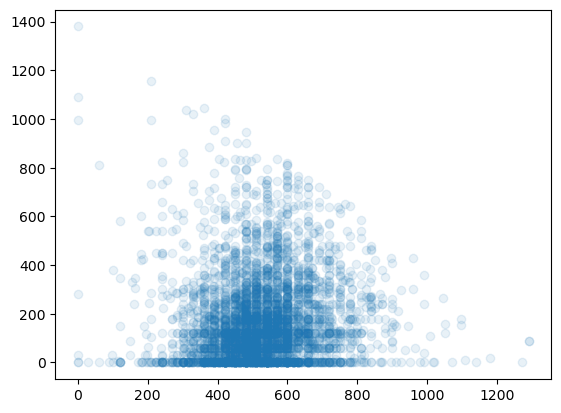

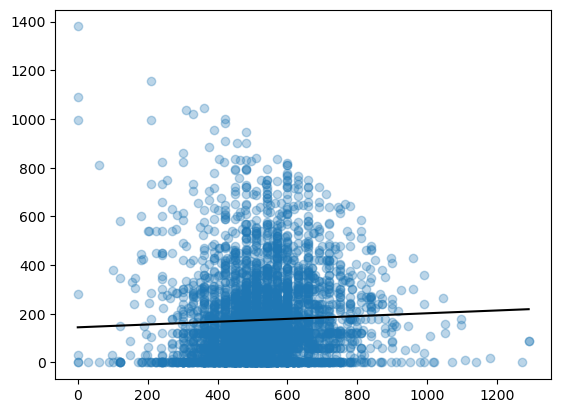

In [28]:
plt.scatter(df['t010101'], df['t120303'], alpha = 0.1)

reg = linest(df['t120303'], df['t010101'])
reg.plot()

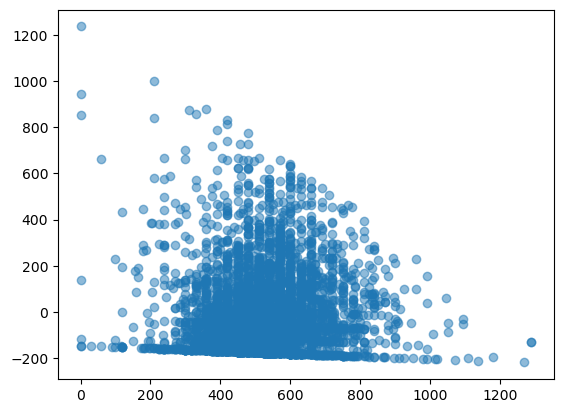

In [35]:
scatter_plot(df['t010101'], reg.residuals)


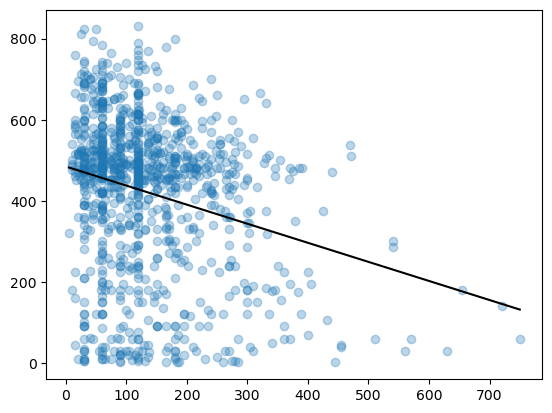

In [33]:
#scatter_plot(df['t010101'], reg.residuals)

y = df['t050101']
x = df['t120303']

df2 = df[(x>0) & (y>0)]
y = df2['t050101']
x = df2['t120303']


linest(y,x).plot()

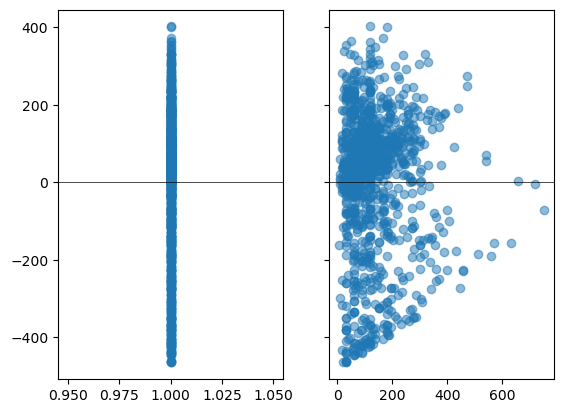

In [34]:
linest(y,x).residual_plot()